# Exploratory Data Analysis on Breast Cancer Wisconsin Data

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


## Load the dataset

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
num_rows = df.shape[0]
print(num_rows)

699


## Summarizing each column (e.g. min, max, mean )

In [5]:
df = df.replace('?', float('nan'))
df["F6"] = pd.to_numeric(df["F6"])
df.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
print(df['F2'].describe(include='all'))

count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: F2, dtype: float64


In [7]:
print(df['F3'].describe(include='all'))

count    699.000000
mean       3.207439
std        2.971913
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: F3, dtype: float64


In [8]:
print(df['F4'].describe(include='all'))

count    699.000000
mean       2.806867
std        2.855379
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: F4, dtype: float64


In [9]:
print(df['F5'].describe(include='all'))

count    699.000000
mean       3.216023
std        2.214300
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: F5, dtype: float64


In [10]:
df = df.replace('?', float('nan'))
df["F6"] = pd.to_numeric(df["F6"])
print(df['F6'].describe(include='all'))

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: F6, dtype: float64


In [11]:
print(df['F7'].describe(include='all'))

count    699.000000
mean       3.437768
std        2.438364
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: F7, dtype: float64


In [12]:
print(df['F8'].describe(include='all'))

count    699.000000
mean       2.866953
std        3.053634
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: F8, dtype: float64


In [13]:
print(df['F9'].describe(include='all'))

count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: F9, dtype: float64


In [14]:
print(df['Class'].describe(include='all'))

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64


## Identify missing values


In [15]:
print(df.isnull().sum())

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


## Replacing the missing values with the “mean” of the column

In [16]:
#Finding the mean of the column having NaN
mean_value=df['F6'].mean()
  
# Replace NaNs in column F6 with the
# mean of values in the same column
df['F6'].fillna(value=mean_value, inplace=True)
print(df.isnull().sum())

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


## Displaying the frequency table of “Class” vs. F6

In [17]:
df.value_counts(['Class', 'F6']).reset_index().rename(columns={0:'count'})

,Class,F6,count
0,2,1.000000,387
1,4,10.000000,129
2,2,2.000000,21
3,4,5.000000,20
4,4,8.000000,19
5,4,1.000000,15
6,2,3.000000,14
7,2,3.544656,14
8,4,3.000000,14
9,4,4.000000,13


## Displaying the scatter plot of F1 to F6, one pair at a time

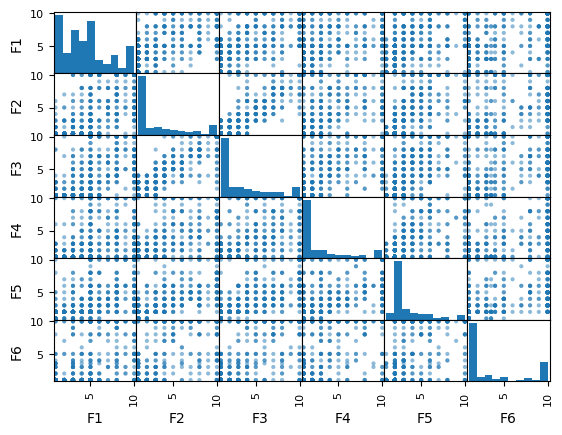

In [18]:
columns = ['F1', 'F2',
            'F3','F4','F5','F6']
   
scatter_matrix(df[columns])
plt.show()

##  Box plot for columns F7 to F9

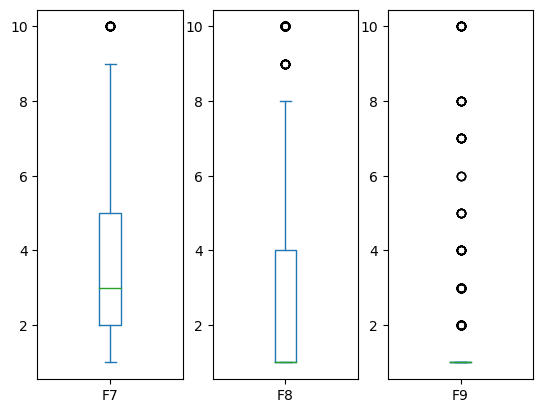

In [19]:
df.iloc[:, 7:10].plot(kind='box', subplots=True, layout=(1, 3), sharex=False)
plt.show()


##  Histogram plot for columns F7 to F9

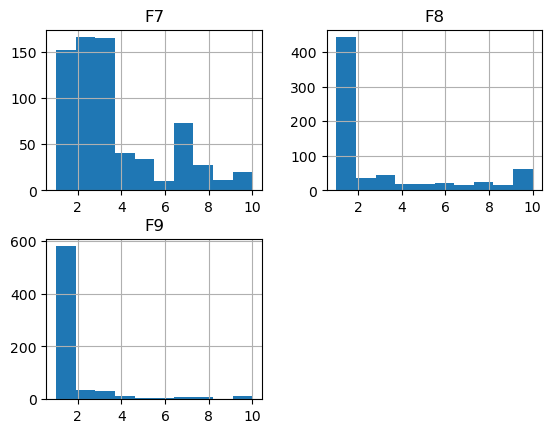

In [20]:
df.iloc[:, 7:10].hist()
plt.show()

## Delete all the objects from the environment. Reload the “breast-cancer-wisconsin.data.csv” from 
canvas into R. Remove any row with a missing value in any of the columns.

In [21]:
%reset -f


## Reload the “breast-cancer-wisconsin.data.csv” and remove the rows with missing values


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv("breast-cancer-wisconsin.csv")

In [23]:
df = df.replace('?', float('nan'))
df["F6"] = pd.to_numeric(df["F6"])
num_rows = df.shape[0]
print(num_rows)

699


In [24]:
print(df.isnull().sum())

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [25]:
df.dropna(how="any", inplace=True)


num_rows = df.shape[0]
print(num_rows)

683


In [26]:
df.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
